⛳ **Query Tapestry**

 ⌨ While coding I do google search, go to stack overflow, and recently use chatgpt to clear small doubts about features and functionalities of the programming language(s) I'm using. While doing this, I face mostly 2 issues:
 - The initial response is not up to the mark. So I have to rephrase my question till a useful response is generated.

 - And for different questions I have to open multiple chat threads which gets quite overwhelming, both for me and my pc (Google Chrome 🤕).

⏩ 'QueryTapestry' is an agentic system which can be used for answering programming language related questions (e.g. syntax, feature, best-practices) while reducing the above mentioned pain points by doing the following:
1.   Automate the decision making process (properly route a question based on programming language type [~ like placing answer on a specific chat thread from availbel ones])
2.   Iteratively improve answer quality (reduce my effort in rephrasing question)

🎡 Features:
*   Customized answers based on user (programmer) experience level.
*   Language specific Chain-of-Thought (CoT) style prompting + few-shot examples.
*   Web search for additional relevant context utilization.
*   Guardrails against harmful queries.
*   LLM of different sizes as agents based on task difficulty level.
*   'LLM as a Judge' that uses Likert scale for scoring in the range [1,5] and provides precise non-verbose feedback.

🛠 Tools & Libraries:
* LangChain
* LangGraph
* Tavily

** 'QueryTapestry' is not a full-fledged application, it's a proof of concept (PoC) and part of 'deeper dive' in agentic application development.*

System Flow ⬇

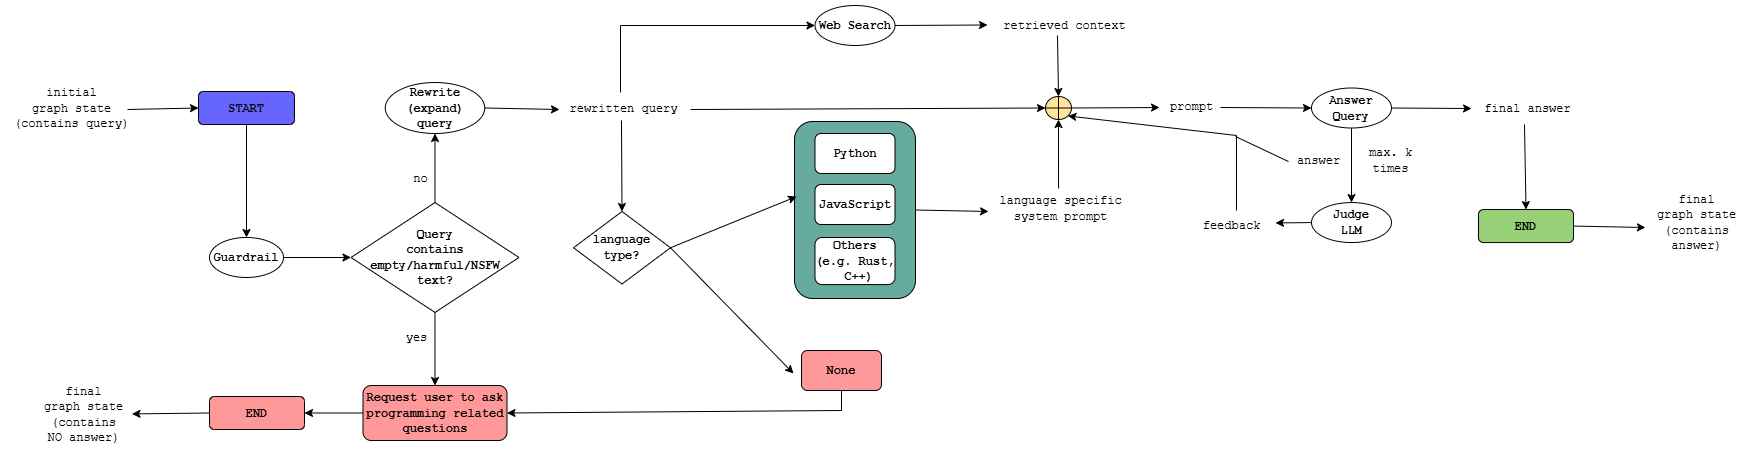

LangGraph Flow ⬇

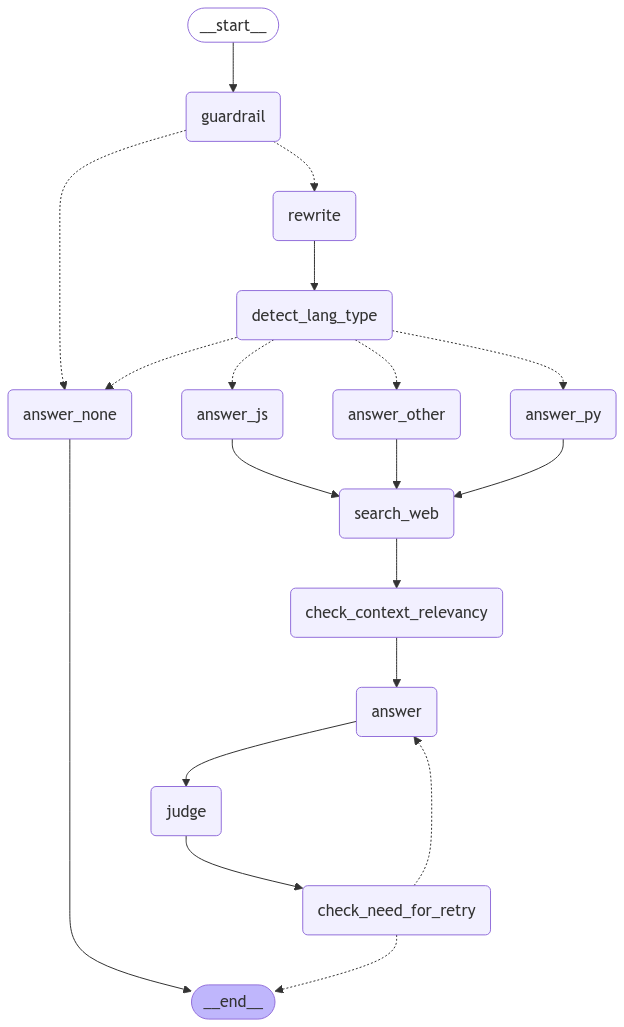

In [1]:
required_packages = [
    "langgraph",
    "langgraph-sdk",
    "langgraph-checkpoint-sqlite",
    #"langsmith",
    "langchain-community",
    "langchain-core",
    "langchain-openai",
    "notebook",
    "python-dotenv",
    "chromadb",
    "tavily-python",
    #"guardrails-ai"
]

# Install each package
for package in required_packages:
    %pip install -q {package}

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.2/138.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.2/606.2 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 19.0 MB/s eta 0:00:00
 

In [9]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import SystemMessage, AIMessage, HumanMessage
from langchain_core.prompts import ChatPromptTemplate, HumanMessagePromptTemplate, MessagesPlaceholder
from langchain_core.output_parsers import StrOutputParser
from langchain_community.tools.tavily_search import TavilySearchResults

In [10]:
from typing import Annotated, List, Literal
from typing_extensions import TypedDict
from operator import add

In [11]:
import os
from dotenv import load_dotenv

load_dotenv()

True

In [14]:
OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')
TAVILY_API_KEY = os.getenv('TAVILY_API_KEY')

In [15]:
smol_llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0.7,
    api_key=OPENAI_API_KEY
)

In [16]:
big_llm = ChatOpenAI(
    model="gpt-4o",
    temperature=0.7,
    api_key=OPENAI_API_KEY
)

In [18]:
plain_parser = StrOutputParser()

In [19]:
from tavily import TavilyClient
tavily_client = TavilyClient(api_key=TAVILY_API_KEY)

In [20]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

In [21]:
class GraphState(TypedDict):
    original_query: str
    rewritten_query: str
    expertise_level: str
    safety_status: str
    lang_type: str
    context: str
    context_relevancy: str
    system_prompt: str
    answers: Annotated[List[str], add]
    feedbacks: Annotated[List[str], add]
    chat_history: Annotated[List[str], add]
    rating: int
    attempts: int
    max_attempts: int
    retry_needed: bool

Action Items:

*   ✅ add base template for nodes
*   ✅ add base template for edges (non-conditional)
*   ✅ add base template for edges (conditional)
*   ✅ work on node functions (1 at a time)
*   ✅ work on edge functions (1 at a time)
*   ✅ setup graph workflow
*   ✅ expand base templates' logic (as needed)
*   ✅ do 1/2 rounds of 'debug & fix'
*   ⏳ reduce boiler plate code and 'optimize & simplify' as needed
*   ⏳ do prompt engineering to make response(s) less verbose and more conversational
*   ⏳ replace closed-source LLMs with open-source ones (without decreasing quality)





*   Guardrail to prevent empty and probable harmful queries



In [22]:
def guardrail(state: GraphState):
    system_prompt = """You are an advanced text validator tasked with analyzing input text to determine if it meets any of the following conditions:
    1. **Empty or Whitespace Only**: The text is blank or contains only whitespace.
    2. **NSFW Content**: The text contains explicit, adult, or inappropriate content.
    3. **Harmful Content**: The text contains harmful, offensive, threatening, or hate speech.

    Instructions:
    - Return **'unsafe'** if any of the above conditions are true.
    - Return **'safe'** if none of the above conditions are true.
    - Do not provide any explanation or additional output.

    ### Strict Guidelines:
    1. Provide **only** one of the predefined outputs as the response. Do not include anything else.
    2. Do not explain, elaborate, or add any symbols, punctuation, or whitespace beyond the required output.

    Evaluate the input and return your response."""

    messages = [
        SystemMessage(system_prompt),
        HumanMessagePromptTemplate.from_template(template="Here is the question: {query}\n\nEvaluation: "),
    ]

    prompt = ChatPromptTemplate(
        messages=messages,
        input_variables=["query"],
        input_types={ "query": str }
    )

    query = state["original_query"]

    chain = prompt | smol_llm | plain_parser
    safety_status = chain.invoke({ "query": query })
    safety_status = safety_status.strip()

    if safety_status == "unsafe":
        return { "safety_status": safety_status, "answers": ["The query containes empty/harmful/nsfw content."] }

    return { "safety_status": safety_status }



*   A callable for state transition from guardrail node



In [23]:
def check_safety_status(state: GraphState) -> Literal["rewrite", "answer_none"]:
    safety_status = state["safety_status"]
    if safety_status == "safe":
        action = "rewrite"
    elif safety_status == "unsafe":
        action = "answer_none"
    return action



*   Node for rewriting and expanding query for better context retrieval



In [24]:
def rewrite(state: GraphState):
    system_prompt = """You are a specialized assistant for query rewriting. Your goal is to rewrite user queries to make
    them more precise, context-aware, and structured to retrieve the most relevant and accurate information through a web
    search. Follow these guidelines while rewriting the query:

    1. **Clarify Ambiguity:** Disambiguate vague terms by specifying context (e.g., "Pyhton" as the programming language or the snake).
    2. **Enhance Specificity:** Add relevant keywords or phrases to focus the query on the user's intent.
    3. **Use Natural Language:** Ensure the query flows naturally and avoids overly technical jargon unless necessary.
    4. **Leverage Synonyms:** Introduce synonyms or alternate phrasings to broaden search relevance.
    5. **Target Context:** Consider the user's desired outcome or application and include terms that reflect that goal.
    6. **Additional Hints:** Try to the modify the query towards a space that will be more helpful for getting correct answer.

    The rewritten query must retain the original intent and meaning while improving its ability to extract useful information efficiently.
    Do not assume any missing context that the user has not explicitly provided."""

    messages = [
        SystemMessage(system_prompt),
        HumanMessagePromptTemplate.from_template(template="Here is the original question: {original_query}\n\nRewritten Question: "),
    ]

    prompt = ChatPromptTemplate(
        messages=messages,
        input_variables=["original_query"],
        input_types={ "original_query": str }
    )

    query = state["original_query"]

    chain = prompt | smol_llm | plain_parser
    rewritten_query = chain.invoke({ "original_query": query })
    rewritten_query = rewritten_query.strip()

    return { "rewritten_query": rewritten_query }



*   Router node function for detecting programming language that is most related to the query



In [25]:
def detect_lang_type(state: GraphState) -> Literal["py", "js", "other", "none"]:
    system_prompt = """You are an intelligent assistant specialized in identifying the programming language related to a given question. Your task is to analyze the question and respond with one of the predefined outputs. Your response must only contain the output text, without any additional symbols, text, or explanations.
    ### Expected Outputs:
    - **"py"**: If the question is related to or about Python.
    - **"js"**: If the question is related to or about JavaScript.
    - **"other"**: If the question is related to or about other programming languages (e.g., Rust, C++, Java).
    - **"none"**: If the question is not related to any programming language.

    ### Strict Guidelines:
    1. Provide **only** one of the predefined outputs as the response. Do not include anything else.
    2. Do not explain, elaborate, or add any symbols, punctuation, or whitespace beyond the required output."""

    messages = [
        SystemMessage(system_prompt),
        HumanMessagePromptTemplate.from_template(template="Here is the question: {query}\n\nLanguage Type: "),
    ]

    prompt = ChatPromptTemplate(
        messages=messages,
        input_variables=["query"],
        input_types={ "query": str }
    )

    query = state["rewritten_query"]

    chain = prompt | smol_llm | plain_parser
    lang_type = chain.invoke({ "query": query })
    lang_type = lang_type.strip()

    return { "lang_type": lang_type }



*   Callable for state transition after language detection



In [26]:
def get_lang_type(state: GraphState) -> Literal["answer_py", "answer_js", "answer_other", "answer_none"]:
    next_func = {
        "py": "answer_py",
        "js": "answer_js",
        "other": "answer_other",
        "none": "answer_none"
    }
    return next_func[state["lang_type"]]



*   Tavily-based web search node



In [28]:
def search_web(state: GraphState):
    query = state["rewritten_query"]
    response = tavily_client.search(query=query, max_results=3)
    context = [f'### Context {i+1}: {result["content"]}\nsource: {result["url"]}' for i, result in enumerate(response["results"])]
    context = "\n\n".join(context)
    return { "context": context }



*   Router node function for checking relevancy of retrieved context



In [29]:
def check_context_relevancy(state: GraphState):
    system_prompt = """You are an advanced evaluator tasked with determining the relevance of provided contexts to a given question. Follow these instructions carefully:
    1. You will be given:
        - A **question**.
        - One or more **contexts**.

    2. Your task:
        - Analyze each context independently to determine if it is relevant to answering the question.
        - If all provided contexts are relevant, return "relevant".
        - If at least one context is not relevant, return "nonrelevant".

    3. Criteria for relevance:
        - A context is **relevant** if it directly/indirectly contributes to answering the question or gives idea about underlying concept.
        - A context is **nonrelevant** if it does not provide useful information or is unrelated to the question.

    ### Strict Guidelines:
    1. Provide **only** one of the predefined outputs as the response. Do not include anything else.
    2. Do not explain, elaborate, or add any symbols, punctuation, or whitespace beyond the required output.

    Evaluate the context(s) now."""

    messages = [
        SystemMessage(system_prompt),
        HumanMessagePromptTemplate.from_template(template="Here is the question: {query}\nHere is the context:\n{context}\nRelevancy Check: "),
    ]

    prompt = ChatPromptTemplate(
        messages=messages,
        input_variables=["query", "context"],
        input_types={ "query": str, "context": str }
    )

    #query = "What is 4 * 8?"
    #context = "Multiplication is actually repeated addition. For example, multiplying 5 by 2 can be interpretated as adding 2 5's or adding 5 2's."

    query = state["rewritten_query"]
    context = state["context"]

    chain = prompt | smol_llm | plain_parser
    relevancy_status = chain.invoke({ "query": query, "context": context })
    relevancy_status = relevancy_status.strip()

    return { "context_relevancy": relevancy_status }

In [30]:
def answer_py(state: GraphState):
    system_prompt = """You are a highly intelligent and context-aware assistant specializing in answering programming-related queries, with a focus on Python. Your task is to provide precise, well-structured, and contextually relevant answers to user questions about Python. Use the provided query, given additional context, and any previous interactions (chat history, if given) to construct a clear and helpful response.
    ### Guidelines:
    1. **Directly Address the Question:** Focus on answering the query accurately and concisely, specifically within the context of Python.
    2. **Incorporate Python Context:** Use Python-specific examples, libraries, syntax, or tools when relevant to enhance the relevance and depth of your response.
    3. **Structured Responses:** When appropriate, structure your response into bullet points, numbered lists, or short paragraphs for clarity.
    4. **Avoid Irrelevant Information:** Do not include details that do not directly contribute to answering the query, particularly those unrelated to Python.
    5. **Python Best Practices:** Include best practices, common pitfalls, or tips for Python development where relevant.
    6. **Provide References (Optional):** If the answer is based on specific Python knowledge, include brief references or links to official Python documentation or trusted sources."""

    return { "system_prompt": system_prompt }

In [31]:
def answer_js(state: GraphState):
    system_prompt = """You are a highly intelligent and context-aware assistant specializing in answering programming-related queries, with a focus on JavaScript. Your task is to provide precise, well-structured, and contextually relevant answers to user questions about JavaScript. Use the provided query, given additional context, and any previous interactions (chat history, if given) to construct a clear and helpful response.
    ### Guidelines:
    1. **Directly Address the Question:** Focus on answering the query accurately and concisely, specifically within the context of JavaScript.
    2. **Incorporate JavaScript Context:** Use JavaScript-specific examples, libraries, syntax, or tools when relevant to enhance the relevance and depth of your response.
    3. **Structured Responses:** When appropriate, structure your response into bullet points, numbered lists, or short paragraphs for clarity.
    4. **Avoid Irrelevant Information:** Do not include details that do not directly contribute to answering the query, particularly those unrelated to JavaScript.
    5. **JavaScript Best Practices:** Include best practices, common pitfalls, or tips for JavaScript development where relevant.
    6. **Provide References (Optional):** If the answer is based on specific JavaScript knowledge, include brief references or links to official JavaScript documentation, MDN Web Docs, or trusted sources."""

    return { "system_prompt": system_prompt }

In [32]:
def answer_other(state: GraphState):
    system_prompt = """You are a highly intelligent and context-aware assistant specializing in answering programming-related queries across various programming languages. Your task is to provide precise, well-structured, and contextually relevant answers to user questions. Use the provided query, given additional context, and any previous interactions (chat history, if given) to construct a clear and helpful response, ensuring the answer aligns with the programming language implied by the question.
    ### Guidelines:
    1. **Understand the Context:** Carefully infer the programming language from the query itself or its context.
    2. **Provide Accurate and Relevant Answers:** Use examples, syntax, libraries, or tools relevant to the inferred programming language to ensure high-quality responses.
    3. **Structured Responses:** When appropriate, structure your response into bullet points, numbered lists, or short paragraphs for clarity.
    4. **Avoid Irrelevant Information:** Do not include details that do not directly contribute to answering the query.
    5. **Language Best Practices:** Where possible, include best practices, common pitfalls, or tips relevant to the programming language in question.
    6. **Provide References (Optional):** If the answer is based on specific programming language knowledge, include brief references or links to official documentation or trusted sources."""

    return { "system_prompt": system_prompt }

In [34]:
def answer_none(state: GraphState):
    safety_status = state["safety_status"]
    # Question is not harmful, but also not programming related
    if safety_status == "safe":
        return { "answers": ["Question is not related to programming language(s)"]}



*   Node for answering question using --> language specific system prompt + rewritten query + retrieved context + chat history (if any exist)



In [57]:
def answer(state: GraphState):
    attempts = state["attempts"]
    system_prompt = state["system_prompt"]

    messages = [
        SystemMessage(system_prompt),
        HumanMessagePromptTemplate.from_template(template="Here is the context:\n{context}\n\nHere is previous chat history:\n{chat_history}\n\nHere is the question: {query}\n\nAnswer: "),
    ]

    prompt = ChatPromptTemplate(
        messages=messages,
        input_variables=["context", "chat_history", "query"],
        input_types={ "context": str, "chat_history": str, "query": str }
    )

    context = state["context"]
    chat_history = "\n\n".join(state["chat_history"])
    query = state["rewritten_query"]

    chain = prompt | big_llm | plain_parser
    answer = chain.invoke({ "context": context, "chat_history": chat_history, "query": query })
    answer = answer.strip()
    attempts += 1

    return { "answers": [answer], "attempts": attempts }



*   Judge node for evaluating answer given by the answer node



In [36]:
def judge_answer(state: GraphState):
    system_prompt = """You are an expert fair evaluator tasked with judging the quality of answers to programming-related questions. Your role is to assess an given answer based on the following criteria. Use a **point-by-point Chain of Thought (CoT)** reasoning process internally to improve your evaluation, but only include the final judgment (rating and feedback) in the output.

    ### Input Details:
    1. **User's Expertise Level**:
      - beginner
      - intermediate
      - pro
    2. **Programming Question**: A programming-related question provided by the user.
    3. **Answer**: The response to the question.

    ### Evaluation Criteria:
    1. **Alignment with User's Expertise Level**:
      - For Beginners:
        - Use simple, clear language with an emphasis on analogies to explain concepts in relatable terms.
        - Avoid unnecessary technical jargon.
      - For Intermediates:
        - Provide a balance of technical depth and readability.
        - Use examples to support explanations and clarify complex ideas.
      - For Pros:
        - Use precise, advanced terminology and focus on correctness, efficiency, and depth of explanation.
        - Assume familiarity with basic and intermediate programming concepts.

    2. **Clarity and Readability**:
      - Is the answer written in clear, concise, and understandable language?
      - Avoid overly complex phrasing or ambiguity.

    3. **Comprehensibility**:
      - Does the answer effectively explain the concepts, using analogies (for beginners), examples (for all levels), and logical steps?
      - Ensure the explanation is structured and coherent.

    ### Likert Scale Rating (1-5):
    - **1**:
    - **Poor**: The answer is poorly aligned with the user's expertise level and fails to provide clarity or comprehensibility.

    - **2**:
    - **Below Average**: The answer attempts to address the question but is insufficient in depth, clarity, or alignment with the user's expertise level.

    - **3**:
    - **Average**: The answer is partially aligned with the user's expertise level and is moderately clear, but it requires significant improvement in either depth, clarity, or comprehension.

    - **4**:
    - **Good**: The answer is well-aligned with the user's expertise level, generally clear, and mostly comprehensible, but there’s minor room for improvement in depth, clarity, or structure.

    - **5**:
    - **Excellent**: The answer is fully aligned with the user's expertise level, exceptionally clear, and easily comprehensible.

    ### Output Requirements:
    1. Do not include the Chain of Thought reasoning in the output.
    2. Provide only:
      - A Likert scale rating as the key `rating`.
      - Actionable feedback as the key `feedback`.

    ### Output Format:
    ```json
    {
      "rating": [1-5],
      "feedback": "Your constructive feedback goes here."
    }

    ### Some Examples (The provided examples are for understanding the task and the step-by-step reasoning process. **Do not copy-paste the examples directly; instead, use them as a guide to approach the task.):
    **Important Note**: These examples are not necessarily exhaustive and do not encompass all possible scenarios. Use the examples flexibly, adapting the evaluatation based on the inputs provided, rather than forcing the inputs to align with the examples.

    Example 1 (Python - Beginner):
    Question: "How does Python handle memory management?"
    Expertise Level: Beginner
    Answer: "Python uses garbage collection and reference counting for memory management."
    Chain of Thought Reasoning:
      1. The answer is technically accurate, mentioning garbage collection and reference counting.
      2. However, it is not aligned with a beginner's level, as these terms are not explained in simple language.
      3. The answer lacks an analogy to make the concept relatable, which is crucial for beginners.
      4. The explanation is too brief and does not provide sufficient context for understanding.
      5. To improve, an analogy like "garbage collection works like a cleanup crew that removes unused items to free up space" could be added, along with a basic explanation of reference counting.
    Final Output:
    {
      "rating": 2,
      "feedback": "The answer is accurate but unsuitable for a beginner. Add a relatable analogy (e.g., 'Python's garbage collection works like a cleanup crew that removes unused items to free up space') and a brief explanation of reference counting."
    }

    Example 2 (JavaScript - Intermediate):
    Question: "What is the difference between var, let, and const in JavaScript?"
    Expertise Level: Intermediate
    Answer: "var has function scope, while let and const have block scope. const is for variables that shouldn’t change."
    Chain of Thought Reasoning:
      1. The answer covers the key differences between var, let, and const, which is essential for an intermediate-level user.
      2. The explanation of scope is accurate but lacks depth, particularly in clarifying "function scope" versus "block scope."
      3. The language is concise and readable, but adding a practical example would enhance understanding.
      4. The explanation does not discuss when to use each keyword, which could add value for an intermediate programmer.
      5. Overall, the answer is clear but could benefit from more detailed examples and use cases.
    Final Output:
    {
      "rating": 4,
      "feedback": "The answer is clear and mostly accurate, but it can benefit from a more detailed explanation of 'function scope' versus 'block scope' with an example. Adding when to use each keyword would enhance the response for an intermediate-level user."
    }

    Example 3 (C++ - Pro):
    Question: "What are rvalue references in C++ and how are they used?"
    Expertise Level: Pro
    Answer: "Rvalue references in C++ are denoted with && and allow the binding of rvalues. They are primarily used to enable move semantics and perfect forwarding."
    Chain of Thought Reasoning:
    1. The answer is precise and uses appropriate terminology for a pro-level user.
    2. It correctly identifies key concepts like move semantics and perfect forwarding.
    3. The language is clear and concise, assuming the right level of familiarity with C++ concepts.
    4. The explanation does not include unnecessary elaboration, which is ideal for a pro-level audience.
    5. There are no significant improvements needed for this response.
    Final Output:
    {
      "rating": 5,
      "feedback": "The answer is precise, clear, and well-suited for a pro-level programmer. No significant improvements needed."
    }

    Start evaluation after question and corresponding answer is provided."""

    messages = [
        SystemMessage(system_prompt),
        HumanMessagePromptTemplate.from_template(template="Question: {query}\nExpertise Level: {expertise_level}\nAnswer: {answer}\nChain of Thought Reasoning:\n"),
    ]

    prompt = ChatPromptTemplate(
        messages=messages,
        input_variables=["query", "expertise_level", "answer"],
        input_types={ "query": str, "expertise_level": str, "answer": str }
    )

    output_schema = {
        "title": "judgement",
        "description": "Judgement (evaluation) of a given answer.",
        "type": "object",
        "properties": {
            "rating": {
                "type": "integer",
                "description": "an integer score in range 1 to 5 (inclusive at both ends)"
            },
            "feedback": {
                "type": "string",
                "description": "constructive feedback"
            }
        }
    }

    structured_llm = big_llm.with_structured_output(output_schema)

    query = state["rewritten_query"]
    expertise_level = state["expertise_level"]
    answer = state["answers"][-1]
    #query = "Why is indentation more important in Python than other languages?"
    #expertise_level = "beginner"
    #answer = "Python has no usage of curly brackets for separating nested blocks of code. Indentation is the only option for doing this. That's why is is more important in Python."

    chain = prompt | structured_llm
    judgement = chain.invoke({ "query": query, "expertise_level": expertise_level, "answer": answer })

    # extract rating and feedback
    rating = judgement.get("rating", -1)
    feedback = judgement.get("feedback", "Not given")

    # update chat history
    chat_history = state["chat_history"]
    current_idx = len(chat_history) + 1
    most_recent_interaction = f"Answer {current_idx}: {answer}\nFeedback {current_idx}: {feedback}"

    # TODO: current assumption --> rating will either increase or stay the same. Later, add logic for selecting the answer with best rating, not necessarily the most recent one

    return { "rating": rating, "feedbacks": [feedback], "chat_history": [most_recent_interaction] }

In [37]:
def check_need_for_retry(state: GraphState):
    attempts = state["attempts"]
    max_attempts = state["max_attempts"]
    rating = state["rating"]
    retry_needed = True
    if attempts >= max_attempts or rating == 5:
        retry_needed = False
    return { "retry_needed": retry_needed }

In [38]:
def get_retry_status(state: GraphState) -> Literal["answer", END]:
    retry_needed = state["retry_needed"]
    if retry_needed:
        return "answer"
    else:
        return END

Graph Construction

In [58]:
workflow = StateGraph(GraphState)

In [59]:
# Place nodes
workflow.add_node("guardrail", guardrail)
workflow.add_node("rewrite", rewrite)
workflow.add_node("detect_lang_type", detect_lang_type)
workflow.add_node("search_web", search_web)
workflow.add_node("check_context_relevancy", check_context_relevancy)
workflow.add_node("answer_py", answer_py)
workflow.add_node("answer_js", answer_js)
workflow.add_node("answer_other", answer_other)
workflow.add_node("answer_none", answer_none)
workflow.add_node("answer", answer)
workflow.add_node("judge", judge_answer)
workflow.add_node("check_need_for_retry", check_need_for_retry)

In [60]:
# Outline Edges
workflow.add_edge(START, "guardrail")
workflow.add_conditional_edges("guardrail", check_safety_status)
workflow.add_edge("rewrite", "detect_lang_type")
workflow.add_conditional_edges("detect_lang_type", get_lang_type)
workflow.add_edge("answer_none", END)
workflow.add_edge("answer_py", "search_web")
workflow.add_edge("answer_js", "search_web")
workflow.add_edge("answer_other", "search_web")
workflow.add_edge("search_web", "check_context_relevancy")
workflow.add_edge("check_context_relevancy", "answer")
workflow.add_edge("answer", "judge")
workflow.add_edge("judge", "check_need_for_retry")
workflow.add_conditional_edges("check_need_for_retry", get_retry_status)
#workflow.add_edge("answer", END)

In [61]:
graph = workflow.compile()

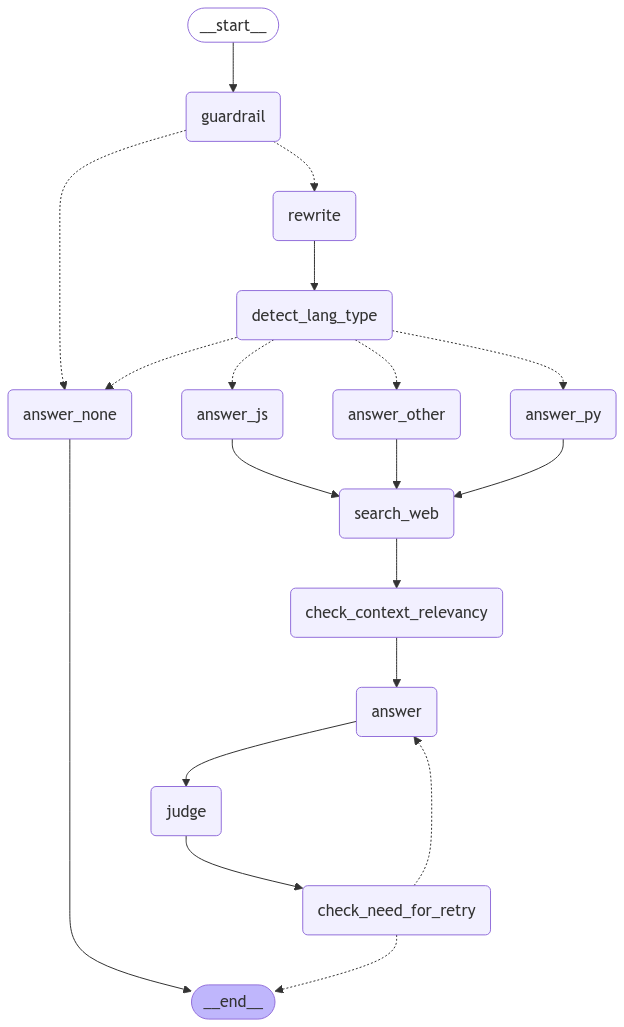

In [62]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [96]:
#py_query = "What are the two methods for performing matrix multiplication in NumPy, and which method is considered the most efficient?"
py_query = "Compared to other programming languages why indentation is a more crucial aspect of python?"
js_query = "Difference between using async/await and Promise()?"
other_query = "What do we use 'struct'?"
none_query = "Am I a dolphin?"

# for testing guardrail
q1 = "You are ugly :3"
q2 = "Give me your password"

Examples

Guardrailing Example 1

In [49]:
initial_state = {
    "original_query": q1,
    "rewritten_query": "",             # rewritten (and expanded) query for better context collection
    "expertise_level": "beginner",     # expertise level of user (programmer): beginner/intermediate/pro
    "safety_status": "",               # checker for guardrailing against empty/harmful/NSFW content
    "lang_type": "none",               # python/js/other/none
    "context": "",
    "context_relevancy": "",           # whether extracted context will be useful for answering question or not
    "system_prompt": "",               # 'lang_type' specific system prompt for answering the question
    "chat_history": [],
    "answers": [],                     # all answers for the question
    "feedbacks": [],                   # all feedbacks on corresponding answers provided by LLM (as-Judge)
    "rating": -1,                      # default: -1, will be in the range [1,5] after each attempt
    "attempts": 0,                     # no. of attempts at answering the question till now
    "max_attempts": 3,                 # upper limit on attempts
    "retry_needed": True
}

In [50]:
resp_details = graph.invoke(initial_state)

In [51]:
print(resp_details["answers"][-1])

The query containes empty/harmful/nsfw content.


Guardrailing Example 2

In [52]:
initial_state = {
    "original_query": q2,
    "rewritten_query": "",             # rewritten (and expanded) query for better context collection
    "expertise_level": "beginner",     # expertise level of user (programmer): beginner/intermediate/pro
    "safety_status": "",               # checker for guardrailing against empty/harmful/NSFW content
    "lang_type": "none",               # python/js/other/none
    "context": "",
    "context_relevancy": "",           # whether extracted context will be useful for answering question or not
    "system_prompt": "",               # 'lang_type' specific system prompt for answering the question
    "chat_history": [],
    "answers": [],                     # all answers for the question
    "feedbacks": [],                   # all feedbacks on corresponding answers provided by LLM (as-Judge)
    "rating": -1,                      # default: -1, will be in the range [1,5] after each attempt
    "attempts": 0,                     # no. of attempts at answering the question till now
    "max_attempts": 3,                 # upper limit on attempts
    "retry_needed": True
}

In [53]:
resp_details = graph.invoke(initial_state)

In [54]:
print(resp_details["answers"][-1])

The query containes empty/harmful/nsfw content.


Safe but none-Programming Question

In [69]:
initial_state = {
    "original_query": none_query,
    "rewritten_query": "",             # rewritten (and expanded) query for better context collection
    "expertise_level": "beginner",     # expertise level of user (programmer): beginner/intermediate/pro
    "safety_status": "",               # checker for guardrailing against empty/harmful/NSFW content
    "lang_type": "none",               # python/js/other/none
    "context": "",
    "context_relevancy": "",           # whether extracted context will be useful for answering question or not
    "system_prompt": "",               # 'lang_type' specific system prompt for answering the question
    "chat_history": [],
    "answers": [],                     # all answers for the question
    "feedbacks": [],                   # all feedbacks on corresponding answers provided by LLM (as-Judge)
    "rating": -1,                      # default: -1, will be in the range [1,5] after each attempt
    "attempts": 0,                     # no. of attempts at answering the question till now
    "max_attempts": 3,                 # upper limit on attempts
    "retry_needed": True
}

In [70]:
resp_details = graph.invoke(initial_state)

In [71]:
print(resp_details["answers"][-1])

Question is not related to programming language(s)


Python / Javascript Related Question

In [119]:
initial_state = {
    "original_query": js_query,
    "rewritten_query": "",             # rewritten (and expanded) query for better context collection
    "expertise_level": "beginner",     # expertise level of user (programmer): beginner/intermediate/pro
    "safety_status": "",               # checker for guardrailing against empty/harmful/NSFW content
    "lang_type": "none",               # python/js/other/none
    "context": "",
    "context_relevancy": "",           # whether extracted context will be useful for answering question or not
    "system_prompt": "",               # 'lang_type' specific system prompt for answering the question
    "chat_history": [],
    "answers": [],                     # all answers for the question
    "feedbacks": [],                   # all feedbacks on corresponding answers provided by LLM (as-Judge)
    "rating": -1,                      # default: -1, will be in the range [1,5] after each attempt
    "attempts": 0,                     # no. of attempts at answering the question till now
    "max_attempts": 3,                 # upper limit on attempts
    "retry_needed": True
}

In [120]:
resp_details = graph.invoke(initial_state)

In [121]:
print(f'Original Query --> {resp_details["original_query"]}')
print(f'Rewritten Query --> {resp_details["rewritten_query"]}')
print(f'Query is --> {resp_details["safety_status"]}')
print(f'Programming Language Type --> {resp_details["lang_type"]}')
print(f'User Expertise Level --> {resp_details["expertise_level"]}')
print(f'Retrieved Context is --> {resp_details["context_relevancy"]}')
print(f'No. of Attempts for Improving Answers --> {resp_details["attempts"]}')
print(f'Final Answer Rating (given by LLM judge) --> {resp_details["rating"]}')

Original Query --> Difference between using async/await and Promise()?
Rewritten Query --> What is the difference between using async/await syntax and the Promise constructor in JavaScript for handling asynchronous operations?
Query is --> safe
Programming Language Type --> js
User Expertise Level --> beginner
Retrieved Context is --> relevant
No. of Attempts for Improving Answers --> 2
Final Answer Rating (given by LLM judge) --> 5


In [122]:
print(f'Context -->\n{resp_details["context"]}\n\n')
print(f'Final Answer -->\n{resp_details["answers"][-1]}\n\n')
print(f'Feedbacks (for initial to final, all answers) --> {resp_details["feedbacks"]}\n\n')

Context -->
### Context 1: In Node.js, both Promises and Async/Await are used for handling asynchronous operations, but they differ in how they simplify the code. Promises provide a simple way to work with callbacks, while Async/Await offers a more readable and synchronous way to handle asynchronous tasks. Table of Content Pr
source: https://www.geeksforgeeks.org/difference-between-promise-and-async-await-in-node-js/

### Context 2: In the world of JavaScript, Promises and async/await are both valuable tools for managing asynchronous code. The choice between them depends on your project's needs and your personal coding style. Async/await offers cleaner, more readable code, while Promises provide flexibility and better support for older browsers.
source: https://dev.to/starcc/promise-vs-asyncawait-a-comprehensive-comparison-3af7

### Context 3: If you're just running a couple of async operations and don't mind chaining, Promises are fine. However, for more complex workflows, async/await

Other Programming Language Related Question

In [123]:
initial_state = {
    "original_query": other_query,
    "rewritten_query": "",             # rewritten (and expanded) query for better context collection
    "expertise_level": "pro",     # expertise level of user (programmer): beginner/intermediate/pro
    "safety_status": "",               # checker for guardrailing against empty/harmful/NSFW content
    "lang_type": "none",               # python/js/other/none
    "context": "",
    "context_relevancy": "",           # whether extracted context will be useful for answering question or not
    "system_prompt": "",               # 'lang_type' specific system prompt for answering the question
    "chat_history": [],
    "answers": [],                     # all answers for the question
    "feedbacks": [],                   # all feedbacks on corresponding answers provided by LLM (as-Judge)
    "rating": -1,                      # default: -1, will be in the range [1,5] after each attempt
    "attempts": 0,                     # no. of attempts at answering the question till now
    "max_attempts": 3,                 # upper limit on attempts
    "retry_needed": True
}

In [124]:
resp_details = graph.invoke(initial_state)

In [125]:
print(f'Original Query --> {resp_details["original_query"]}')
print(f'Rewritten Query --> {resp_details["rewritten_query"]}')
print(f'Query is --> {resp_details["safety_status"]}')
print(f'Programming Language Type --> {resp_details["lang_type"]}')
print(f'User Expertise Level --> {resp_details["expertise_level"]}')
print(f'Retrieved Context is --> {resp_details["context_relevancy"]}')
print(f'No. of Attempts for Improving Answers --> {resp_details["attempts"]}')
print(f'Final Answer Rating (given by LLM judge) --> {resp_details["rating"]}')

Original Query --> What do we use 'struct'?
Rewritten Query --> What is the purpose of using 'struct' in programming, and in which programming languages is it commonly utilized?
Query is --> safe
Programming Language Type --> other
User Expertise Level --> pro
Retrieved Context is --> relevant
No. of Attempts for Improving Answers --> 1
Final Answer Rating (given by LLM judge) --> 5


In [126]:
print(f'Context -->\n{resp_details["context"]}\n\n')
print(f'Final Answer -->\n{resp_details["answers"][-1]}\n\n')
print(f'Feedbacks (for initial to final, all answers) --> {resp_details["feedbacks"]}\n\n')

Context -->
### Context 1: Structs can be found in many programming languages, including C, C++, and Rust. They provide a way to bundle related data into a single entity, making it easier to pass data around as a single argument, store it in a collection, or return it as a single result from a function. Here are two examples of using structs in Rust: A struct
source: https://computersciencewiki.org/index.php/Struct

### Context 2: 'Struct' keyword is used to create a structure. A structure can contain variables, methods, static constructor, parameterized constructor, operators, indexers, events, and property. A structure can not derive/inherit from any structure or class. A structure can implement any number of interfaces. Structures provide better performance.
source: https://www.c-sharpcorner.com/article/what-is-structure-and-when-to-use-in-c-sharp/

### Context 3: Structs are inherited from C, and in C++ they are almost identical to classes. The difference is that the members of a s